In [2]:
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torchvision
from PIL import Image

In [25]:

transform2 = transforms.Compose([
    transforms.RandomHorizontalFlip(), # randomly flip and rotate
    transforms.Resize((64,64)),
    transforms.RandomRotation(10),
    transforms.ToTensor()
    #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

class Actress_age_Dataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        self.actress_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.actress_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir,
                                self.actress_frame.iloc[idx, 0])
        #image = io.imread(img_name)
        image = Image.open(img_name)
        image_class = self.actress_frame.iloc[idx,1]
        if self.transform:
            image = self.transform(image)

        return np.asarray(image),image_class
    
class Actress_age_Dataset_test(Actress_age_Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        Actress_age_Dataset.__init__(self, csv_file, root_dir, transform=transform)
        
    def __getitem__(self,idx):
        img_name = os.path.join(self.root_dir,
                                self.actress_frame.iloc[idx, 0])
        #image = io.imread(img_name)
        image = Image.open(img_name)
        if self.transform:
            image = self.transform(image)
        return image

In [26]:
actress_dataset_train = Actress_age_Dataset("./train_DETg9GD/train.csv","./train_DETg9GD/Train/",
                                            transform2)
actress_dataset_test = Actress_age_Dataset_test("./test_Bh8pGW3/test.csv","./test_Bh8pGW3/Test/",
                                            transform2)

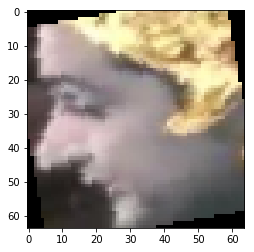

In [32]:
img=actress_dataset_train[2][0]
img=np.transpose(img, (1, 2, 0))
plt.imshow(img)

In [17]:
img.shape

(3, 64, 64)